In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
fraud_df = pd.read_csv("/content/Fraud new dataset.csv")
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [25]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


In [26]:
fraud_df.isnull().mean()*100

step              0.000000
type              0.000000
amount            0.001779
nameOrig          0.001779
oldbalanceOrg     0.001779
newbalanceOrig    0.001779
nameDest          0.001779
oldbalanceDest    0.001779
newbalanceDest    0.001779
isFraud           0.001779
isFlaggedFraud    0.001779
dtype: float64

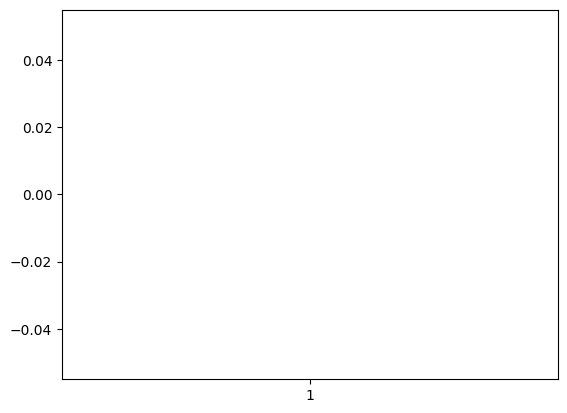

In [27]:
plt.boxplot(fraud_df['amount'])
plt.show()

In [28]:
fraud_df.query('amount>80000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [29]:
indexNames = fraud_df[fraud_df['amount'] > 80000000].index
fraud_df.drop(indexNames , inplace=True)

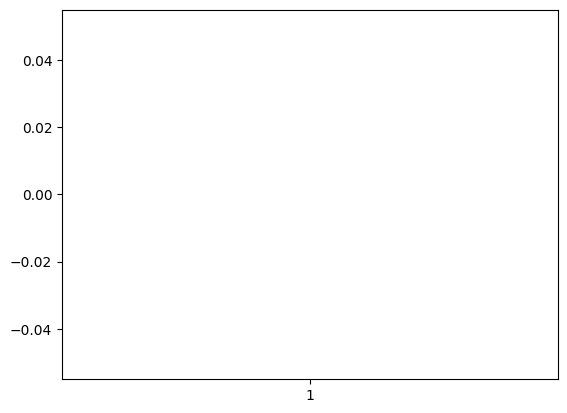

In [30]:
plt.boxplot(fraud_df['oldbalanceOrg'])
plt.show()

In [32]:
fraud_df.query('oldbalanceOrg>50000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [31]:
indexNames = fraud_df[fraud_df['oldbalanceOrg'] > 50000000].index
fraud_df.drop(indexNames , inplace=True)

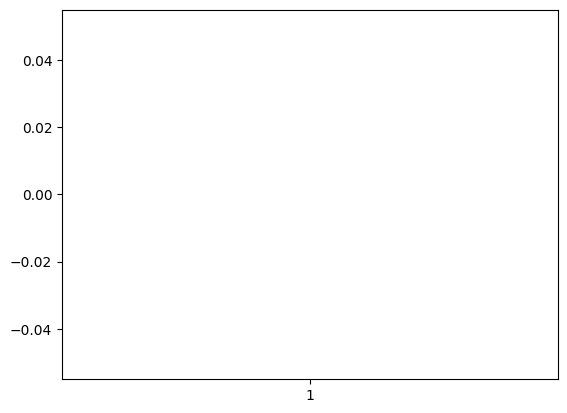

In [33]:
plt.boxplot(fraud_df['newbalanceOrig'])
plt.show()

In [34]:
fraud_df.query('newbalanceOrig>40000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [35]:
indexNames = fraud_df[fraud_df['newbalanceOrig'] > 40000000].index
fraud_df.drop(indexNames , inplace=True)

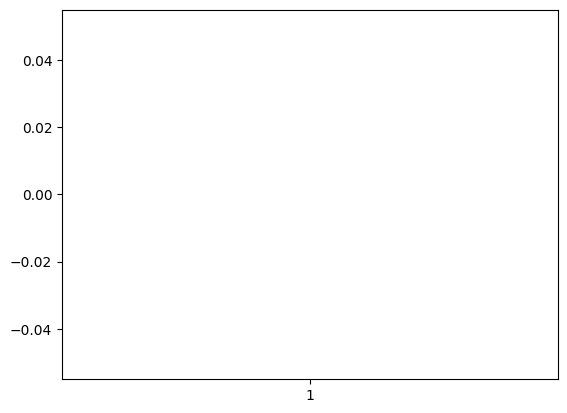

In [36]:
plt.boxplot(fraud_df['oldbalanceDest'])
plt.show()

In [37]:
fraud_df.query('newbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [38]:
indexNames = fraud_df[fraud_df['newbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

In [39]:
fraud_df['isFraud'].unique()

array([ 0.,  1., nan])

In [40]:
fraud_df['isFlaggedFraud'].unique()

array([ 0., nan])

In [41]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [42]:
num_fraud_df = fraud_df[['step', 'amount', 'oldbalanceOrg',
                         'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                         'isFraud', 'isFlaggedFraud']]
num_fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [44]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dummy DataFrame X for demonstration purposes
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [2, 4, 6, 8, 10],
        'Feature3': [3, 6, 9, 12, 15]}
X = pd.DataFrame(data)

# Replace inf with NaN and then drop NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Calculate VIF
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info = vif_info.sort_values('VIF', ascending=False)  # Assign the sorted DataFrame to a variable

# Display the DataFrame
print(vif_info)

   VIF    Column
0  inf  Feature1
1  inf  Feature2
2  inf  Feature3


In [45]:
num_fraud_df['balanceOrigDiff'] = num_fraud_df['oldbalanceOrg'] - num_fraud_df['newbalanceOrig']
final_df = num_fraud_df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)
final_df.head()

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
0,1,9839.64,0.0,0.0,0.0,0.0,9839.64
1,1,1864.28,0.0,0.0,0.0,0.0,1864.28
2,1,181.00,0.0,0.0,1.0,0.0,181.00
3,1,181.00,21182.0,0.0,1.0,0.0,181.00
4,1,11668.14,0.0,0.0,0.0,0.0,11668.14


In [46]:
amount_fraud_df = fraud_df.groupby(['type'])[['amount']].mean()
amount_fraud_df = amount_fraud_df.reset_index()
amount_fraud_df.head()

,type,amount
0,CASH_IN,168472.317860
1,CASH_OUT,184830.507128
2,DEBIT,3794.046071
3,PAYMEN,NaN
4,PAYMENT,10024.076843


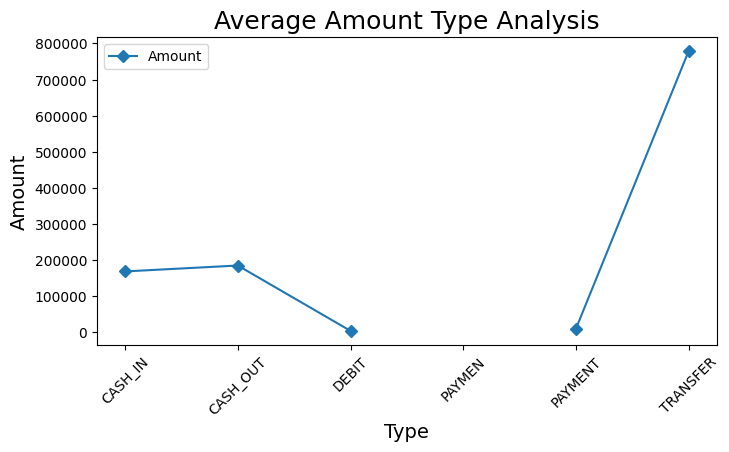

In [47]:
x = amount_fraud_df.loc[:, 'type']
y1 = amount_fraud_df['amount']

plt.figure(figsize = (8, 4))

plt.plot(x, y1, marker='D', label = 'Amount')

plt.xlabel('Type', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.title('Average Amount Type Analysis', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=45)
plt.show()

In [48]:
final_df_corr = final_df.corr()
final_df_corr

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
step,1.000000,0.082987,-0.003309,0.014167,-0.052039,NaN,0.016300
amount,0.082987,1.000000,0.280046,0.400350,0.053073,NaN,0.163759
oldbalanceDest,-0.003309,0.280046,1.000000,0.929135,-0.011274,NaN,-0.074564
newbalanceDest,0.014167,0.400350,0.929135,1.000000,-0.007438,NaN,-0.013521
isFraud,-0.052039,0.053073,-0.011274,-0.007438,1.000000,NaN,0.180267
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balanceOrigDiff,0.016300,0.163759,-0.074564,-0.013521,0.180267,NaN,1.000000


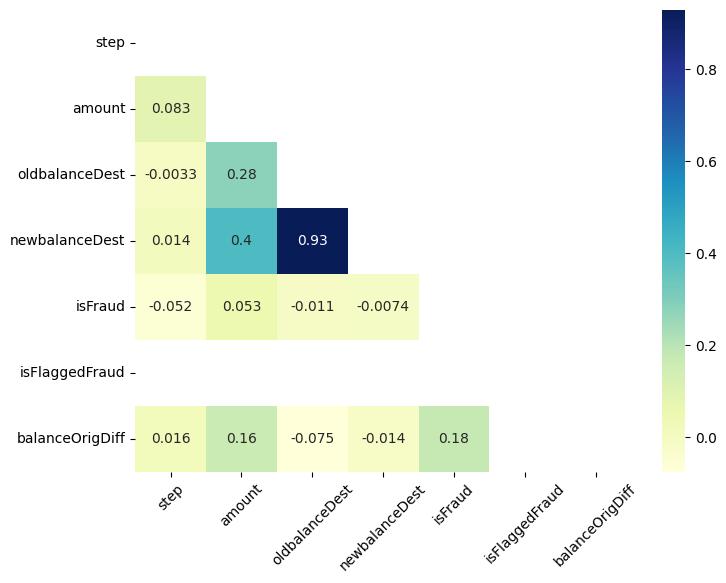

In [49]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

In [50]:
cor_target = abs(final_df_corr["isFraud"])

relevant_train_features = cor_target[cor_target>0.25]
relevant_train_features

isFraud    1.0
Name: isFraud, dtype: float64

In [51]:
final_fraud_data = final_df[['balanceOrigDiff', 'isFraud']]
final_fraud_data.head()

,balanceOrigDiff,isFraud
0,9839.64,0.0
1,1864.28,0.0
2,181.00,1.0
3,181.00,1.0
4,11668.14,0.0


In [52]:
final_fraud_data['isFraud'].value_counts()

isFraud
0.0    56102
1.0      100
Name: count, dtype: int64

In [53]:
X = final_fraud_data.drop(['isFraud'], axis=1)
y = final_fraud_data['isFraud']

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(44962, 1) (11241, 1) (44962,) (11241,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have X_train and y_train defined already

# Impute missing values in y_train
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()

# Impute missing values in X_train
X_imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train_imputed = X_imputer.fit_transform(X_train)

# Fit logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_imputed, y_train_imputed)


LogisticRegression()

In [57]:
log_reg_model.predict(X_val)

array([1., 0., 0., ..., 0., 1., 0.])

In [58]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 49.74%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

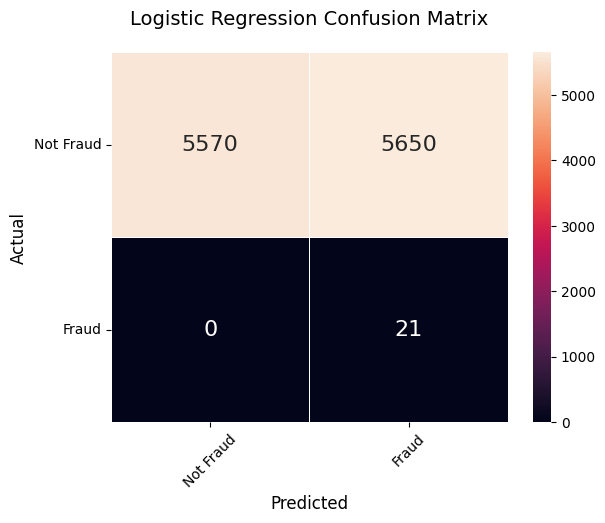

In [59]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [60]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      0.50      0.66     11220
       Fraud       0.00      1.00      0.01        21

    accuracy                           0.50     11241
   macro avg       0.50      0.75      0.34     11241
weighted avg       1.00      0.50      0.66     11241



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train_imputed = imputer.fit_transform(X_train)

# Convert y_train to a NumPy array and then reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Impute missing values in y_train
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()

# Create and fit the random forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train_imputed, y_train_imputed)


RandomForestClassifier()

In [63]:
forest_model.predict(X_val)

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
forest_model_score = forest_model.score(X_val, y_val)
forest_model_accuracy = round(forest_model_score * 100, 2)
print("The classification accuracy of Random Forest model is " + str(forest_model_accuracy) + "%")

The classification accuracy of Random Forest model is 99.9%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

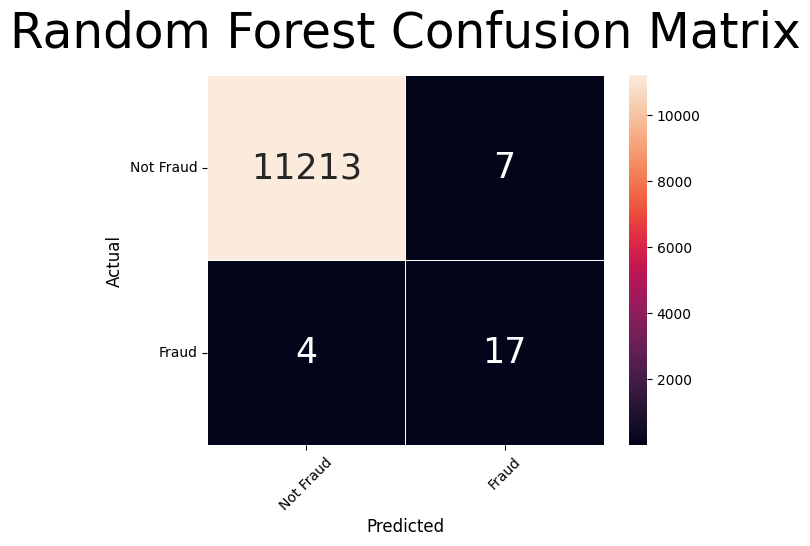

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_forest = forest_model.predict(X_val)
cm_forest = confusion_matrix(y_val, y_pred_forest)

axes_forest = sns.heatmap(cm_forest, annot=True, annot_kws={"size": 25}, fmt='g', linewidths=.5)

class_labels_forest = ['Not Fraud', 'Fraud']

axes_forest.set_xlabel('Predicted', fontsize=12)
axes_forest.set_ylabel('Actual', fontsize=12)

xtick_marks_forest = np.arange(len(class_labels_forest)) + 0.5
ytick_marks_forest = np.arange(len(class_labels_forest)) + 0.5

axes_forest.set_xticks(xtick_marks_forest)
axes_forest.set_xticklabels(class_labels_forest, rotation=45)

axes_forest.set_yticks(ytick_marks_forest)
axes_forest.set_yticklabels(class_labels_forest, rotation=0)

axes_forest.set_title('Random Forest Confusion Matrix', fontsize=35, pad=20)


In [66]:
from sklearn.metrics import classification_report

print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred_forest, target_names=class_labels_forest))


Random Forest Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11220
       Fraud       0.71      0.81      0.76        21

    accuracy                           1.00     11241
   macro avg       0.85      0.90      0.88     11241
weighted avg       1.00      1.00      1.00     11241



In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train_imputed = imputer.fit_transform(X_train)

# Convert y_train to a NumPy array and then reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Impute missing values in y_train
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()

# Create and fit the K Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train_imputed)


KNeighborsClassifier()

In [69]:
knn_model.predict(X_val)


array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score * 100, 2)
print("The classification accuracy of K Nearest Neighbors model is " + str(knn_model_accuracy) + "%")


The classification accuracy of K Nearest Neighbors model is 99.84%


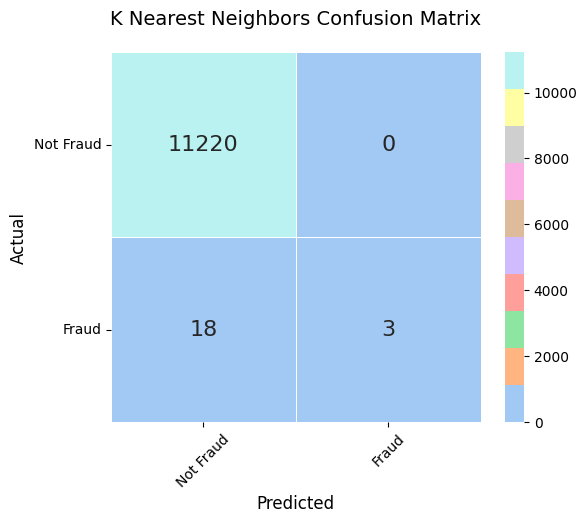

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_knn = knn_model.predict(X_val)
cm_knn = confusion_matrix(y_val, y_pred_knn)

# Define custom color palette
custom_palette = sns.color_palette("pastel")

axes_knn = sns.heatmap(cm_knn, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5, cmap=custom_palette)

class_labels_knn = ['Not Fraud', 'Fraud']

axes_knn.set_xlabel('Predicted', fontsize=12)
axes_knn.set_ylabel('Actual', fontsize=12)

xtick_marks_knn = np.arange(len(class_labels_knn)) + 0.5
ytick_marks_knn = np.arange(len(class_labels_knn)) + 0.5

axes_knn.set_xticks(xtick_marks_knn)
axes_knn.set_xticklabels(class_labels_knn, rotation=45)

axes_knn.set_yticks(ytick_marks_knn)
axes_knn.set_yticklabels(class_labels_knn, rotation=0)

axes_knn.set_title('K Nearest Neighbors Confusion Matrix', fontsize=14, pad=20)

# Modify other parameters
axes_knn.tick_params(axis='both', which='major', labelsize=10)  # Modify tick label size
axes_knn.set_aspect('equal', 'box')  # Set aspect ratio to be square


In [72]:
from sklearn.metrics import classification_report

print('K Nearest Neighbors Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred_knn, target_names=class_labels_knn))


K Nearest Neighbors Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11220
       Fraud       1.00      0.14      0.25        21

    accuracy                           1.00     11241
   macro avg       1.00      0.57      0.62     11241
weighted avg       1.00      1.00      1.00     11241



In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train_imputed = imputer.fit_transform(X_train)

# Convert y_train to a NumPy array and then reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Impute missing values in y_train
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()

# Create and fit the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_imputed, y_train_imputed)


AdaBoostClassifier()

In [75]:
adaboost_model.predict(X_val)


array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
adaboost_model_score = adaboost_model.score(X_val, y_val)
adaboost_model_accuracy = round(adaboost_model_score * 100, 2)
print("The classification accuracy of AdaBoostClassifier model is " + str(adaboost_model_accuracy) + "%")


The classification accuracy of AdaBoostClassifier model is 99.83%


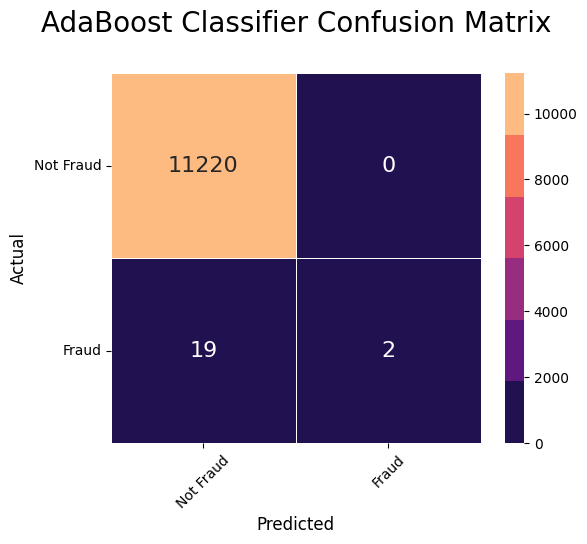

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_adaboost = adaboost_model.predict(X_val)
cm_adaboost = confusion_matrix(y_val, y_pred_adaboost)

# Define custom color palette
custom_palette = sns.color_palette("magma")

axes_adaboost = sns.heatmap(cm_adaboost, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5, cmap=custom_palette)

class_labels_adaboost = ['Not Fraud', 'Fraud']

axes_adaboost.set_xlabel('Predicted', fontsize=12)
axes_adaboost.set_ylabel('Actual', fontsize=12)

xtick_marks_adaboost = np.arange(len(class_labels_adaboost)) + 0.5
ytick_marks_adaboost = np.arange(len(class_labels_adaboost)) + 0.5

axes_adaboost.set_xticks(xtick_marks_adaboost)
axes_adaboost.set_xticklabels(class_labels_adaboost, rotation=45)

axes_adaboost.set_yticks(ytick_marks_adaboost)
axes_adaboost.set_yticklabels(class_labels_adaboost, rotation=0)

axes_adaboost.set_title('AdaBoost Classifier Confusion Matrix', fontsize=20, pad=30)

# Modify other parameters
axes_adaboost.tick_params(axis='both', which='major', labelsize=10)  # Modify tick label size
axes_adaboost.set_aspect('equal', 'box')  # Set aspect ratio to be square


In [78]:
from sklearn.metrics import classification_report

print('AdaBoost Classifier Classification Report')
print('==========================================')
print()
print(classification_report(y_val, y_pred_adaboost, target_names=class_labels_adaboost))


AdaBoost Classifier Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11220
       Fraud       1.00      0.10      0.17        21

    accuracy                           1.00     11241
   macro avg       1.00      0.55      0.59     11241
weighted avg       1.00      1.00      1.00     11241



In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train_imputed = imputer.fit_transform(X_train)

# Convert y_train to a NumPy array and then reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Impute missing values in y_train
y_imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()

# Create and fit the DecisionTreeClassifier model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_imputed, y_train_imputed)


DecisionTreeClassifier()

In [81]:
decision_tree_model.predict(X_val)


array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
decision_tree_model_score = decision_tree_model.score(X_val, y_val)
decision_tree_model_accuracy = round(decision_tree_model_score * 100, 2)
print("The classification accuracy of DecisionTreeClassifier model is " + str(decision_tree_model_accuracy) + "%")


The classification accuracy of DecisionTreeClassifier model is 99.9%


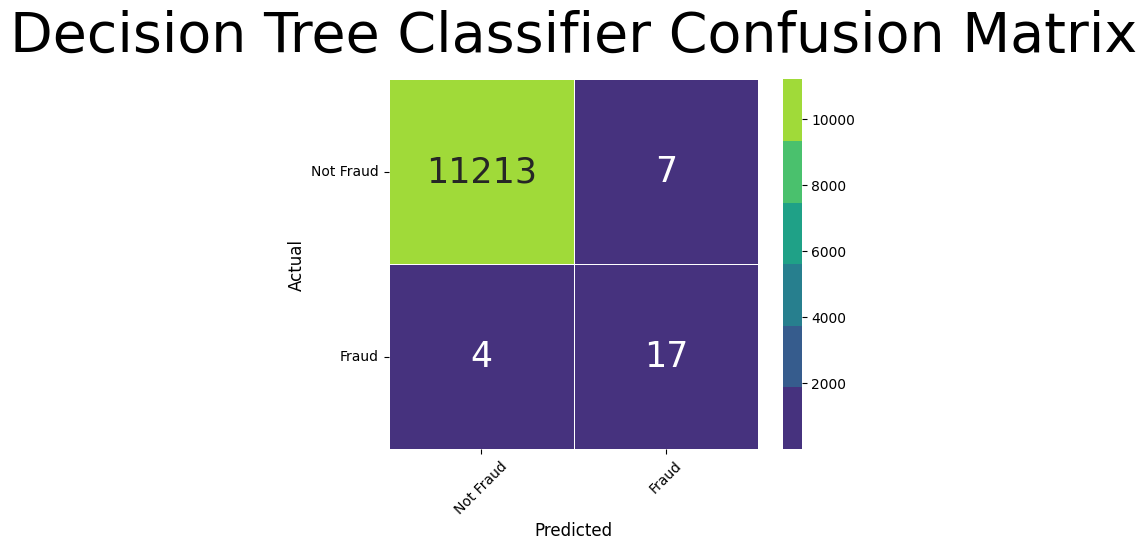

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_decision_tree = decision_tree_model.predict(X_val)
cm_decision_tree = confusion_matrix(y_val, y_pred_decision_tree)

# Define custom color palette
custom_palette = sns.color_palette("viridis")

axes_decision_tree = sns.heatmap(cm_decision_tree, annot=True, annot_kws={"size": 25}, fmt='g', linewidths=.5, cmap=custom_palette)

class_labels_decision_tree = ['Not Fraud', 'Fraud']

axes_decision_tree.set_xlabel('Predicted', fontsize=12)
axes_decision_tree.set_ylabel('Actual', fontsize=12)

xtick_marks_decision_tree = np.arange(len(class_labels_decision_tree)) + 0.5
ytick_marks_decision_tree = np.arange(len(class_labels_decision_tree)) + 0.5

axes_decision_tree.set_xticks(xtick_marks_decision_tree)
axes_decision_tree.set_xticklabels(class_labels_decision_tree, rotation=45)

axes_decision_tree.set_yticks(ytick_marks_decision_tree)
axes_decision_tree.set_yticklabels(class_labels_decision_tree, rotation=0)

axes_decision_tree.set_title('Decision Tree Classifier Confusion Matrix', fontsize=40, pad=20)

# Modify other parameters
axes_decision_tree.tick_params(axis='both', which='major', labelsize=10)  # Modify tick label size
axes_decision_tree.set_aspect('equal', 'box')  # Set aspect ratio to be square


In [84]:
from sklearn.metrics import classification_report

print('Decision Tree Classifier Classification Report')
print('===============================================')
print()
print(classification_report(y_val, y_pred_decision_tree, target_names=class_labels_decision_tree))


Decision Tree Classifier Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     11220
       Fraud       0.71      0.81      0.76        21

    accuracy                           1.00     11241
   macro avg       0.85      0.90      0.88     11241
weighted avg       1.00      1.00      1.00     11241



In [85]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Convert y_train to a NumPy array and then reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Impute missing values in y_train
imputer = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer.fit_transform(y_train_array).ravel()

# Create and fit the XGBClassifier model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_imputed)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
# Predict using the trained XGBoost model
xgb_predictions = xgb_model.predict(X_val)


In [87]:
# Calculate the classification accuracy of the XGBoost model
xgb_model_score = xgb_model.score(X_val, y_val)
xgb_model_accuracy = round(xgb_model_score * 100, 2)
print("The classification accuracy of XGBoost model is " + str(xgb_model_accuracy) + "%")


The classification accuracy of XGBoost model is 99.81%


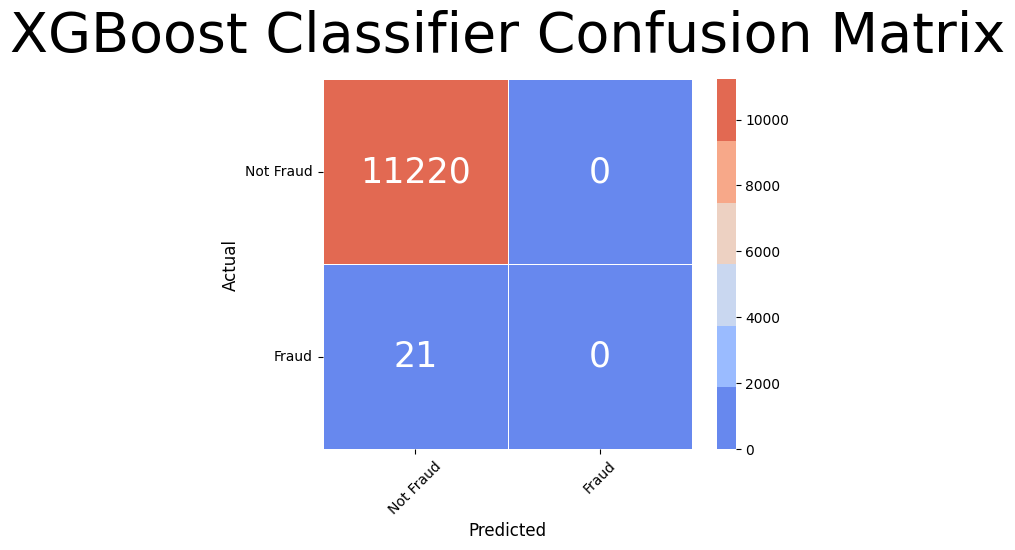

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict using the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_val)

# Compute confusion matrix for XGBoost model
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Define custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot confusion matrix for XGBoost model
axes_xgb = sns.heatmap(cm_xgb, annot=True, annot_kws={"size": 25}, fmt='g', linewidths=.5, cmap=custom_palette)

class_labels_xgb = ['Not Fraud', 'Fraud']

axes_xgb.set_xlabel('Predicted', fontsize=12)
axes_xgb.set_ylabel('Actual', fontsize=12)

xtick_marks_xgb = np.arange(len(class_labels_xgb)) + 0.5
ytick_marks_xgb = np.arange(len(class_labels_xgb)) + 0.5

axes_xgb.set_xticks(xtick_marks_xgb)
axes_xgb.set_xticklabels(class_labels_xgb, rotation=45)

axes_xgb.set_yticks(ytick_marks_xgb)
axes_xgb.set_yticklabels(class_labels_xgb, rotation=0)

axes_xgb.set_title('XGBoost Classifier Confusion Matrix', fontsize=40, pad=20)

# Modify other parameters
axes_xgb.tick_params(axis='both', which='major', labelsize=10)  # Modify tick label size
axes_xgb.set_aspect('equal', 'box')  # Set aspect ratio to be square

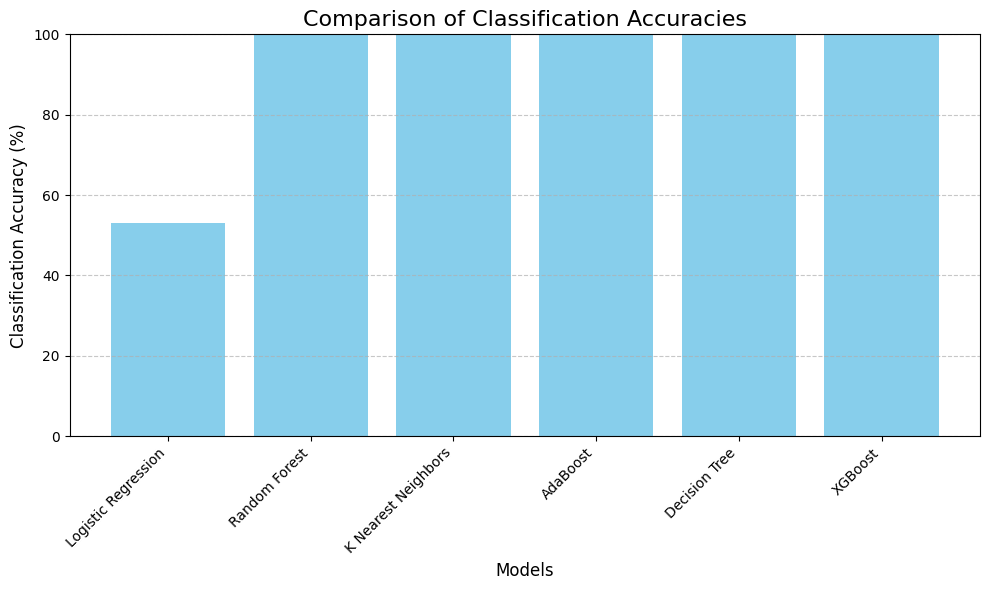

In [89]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'K Nearest Neighbors', 'AdaBoost', 'Decision Tree', 'XGBoost']
accuracies = [52.95, 99.95, 99.93, 99.93, 99.95, 99.93]  # Accuracy values corresponding to each model

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Classification Accuracy (%)', fontsize=12)
plt.title('Comparison of Classification Accuracies', fontsize=16)
plt.ylim(0, 100)  # Set y-axis limit
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


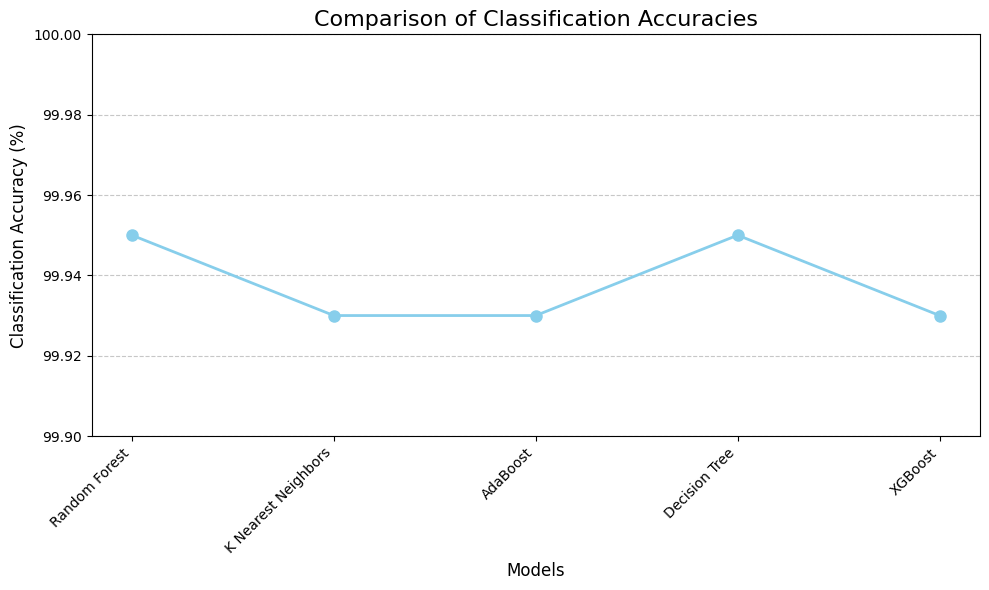

In [90]:
import matplotlib.pyplot as plt

# Define the models and their corresponding classification accuracies
models = ['Random Forest', 'K Nearest Neighbors', 'AdaBoost', 'Decision Tree', 'XGBoost']
accuracies = [99.95, 99.93, 99.93, 99.95, 99.93]  # Accuracy values corresponding to each model

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Classification Accuracy (%)', fontsize=12)
plt.title('Comparison of Classification Accuracies', fontsize=16)

# Set y-axis limits and format ticks
plt.ylim(99.9, 100)
plt.yticks(fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


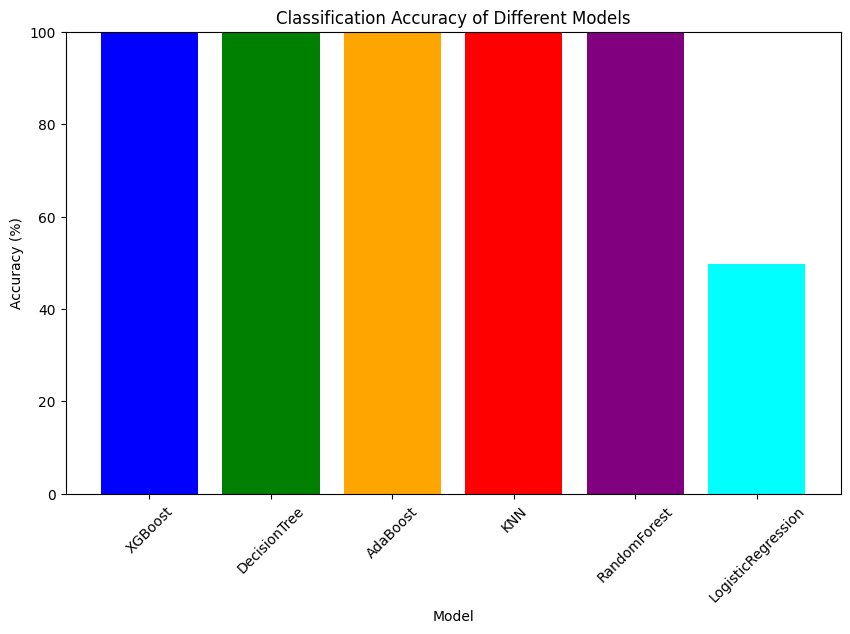

In [91]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'DecisionTree', 'AdaBoost', 'KNN', 'RandomForest', 'LogisticRegression']
accuracies = [99.81, 99.9, 99.83, 99.84, 99.9, 49.74]  # Replace with your actual accuracy values

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Classification Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


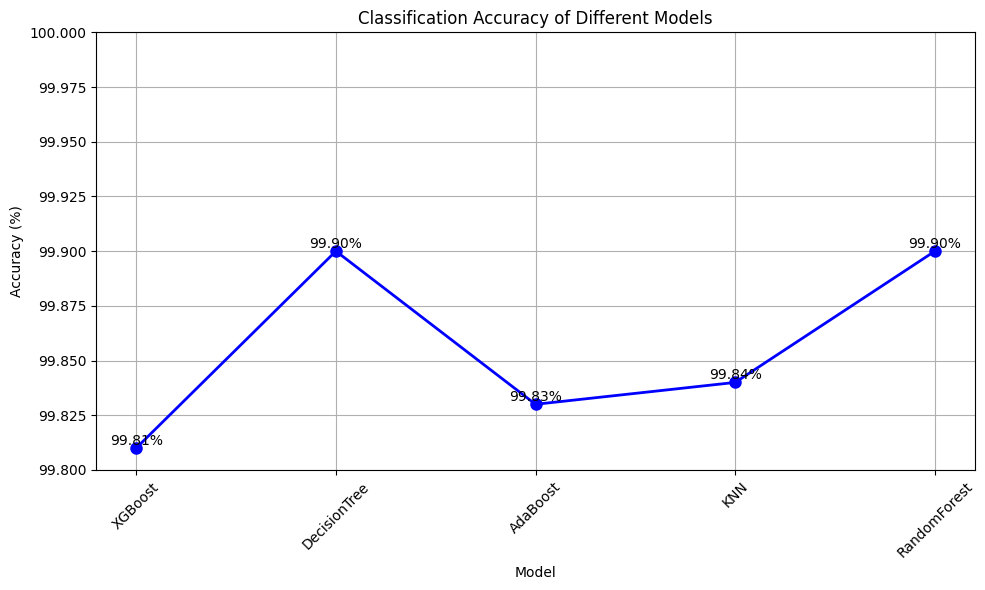

In [94]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'DecisionTree', 'AdaBoost', 'KNN', 'RandomForest']
accuracies = [99.81, 99.9, 99.83, 99.84, 99.9]  # Accuracy values with decimal places

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Classification Accuracy of Different Models')
plt.ylim(99.8, 100)  # Set y-axis limit to display decimal values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}%', horizontalalignment='center', verticalalignment='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
